# Analyzing Risk of Default in Loan Repayment

Here my task is to prepare a report for credit division of a bank. I will try to investigate the affect of client's marital status and the nummber of children on the probability of default in loan repayment. The bank already has some data regarding the creditworthiness of the clients.

This report will be considered when making a credit assesment for prospective borrowers. Credit assessment is used to evaluate the ability of prospective borrowers to repay their loans

# Table of Contents <a id='back'></a>

* [Stage 1. Data Overview](#data_review)
* [Stage 2. Data Preprocessing](#data_preprocessing)
    * [2.1 Data Preprocessing Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Data Transformation](#data_transformation)
    * [3.1 Dealing With Missing Values](#dealing_with_missing_values)
    * [3.2 Data Preprocessing 'total_income' column](#data_preprocessing_in_total_income_column)
    * [3.3 Data Preprocessing 'days_employed' column](#data_preprocessing_in_days_employed_column)
* [Stage 4. Testing Hypothesis](#hypothesis)
    * [4.1 Hypothesis 1: Correlation Between Having Children and Timeliness in Loan Repayment](#children)
    * [4.2 Hypothesis 2: Correlation Between Marital Status and Timeliness in Loan Repayment](#family_status)
    * [4.3 Hypothesis 3: Correlation Between Income Level and Timeliness in Loan Repayment](#total_income)
    * [4.4 Hypothesis 4: Correlation Betweeen Variant of Loan Purposes and Timeliness in Loan Repayment](#total_income)
* [General Conclusions](#end)

## Data Overview

In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
credit_scoring = pd.read_csv('/datasets/credit_scoring_eng.csv')
credit_scoring

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Data Prepocessing

**Data Description**
- `children` - Number of Children in a family
- `days_employed` - Number of days that the borrower has been employed
- `dob_years` - Age of the borrower in years
- `education` - Borrower's education level
- `education_id` - Identifier for the borrower's educational level
- `family_status` - Borrower's marital status
- `family_status_id` - Identifier for borrower's marital status
- `gender` - Borrower's gender
- `income_type` - Source of income
- `debt` - A binary variable indicating whether the borrower has any outstanding debt or loan payments
- `total_income` - Borrower's monthly income
- `purpose` - Loan purposes

In [ ]:
credit_scoring.shape

(21525, 12)

In [ ]:
credit_scoring.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [ ]:
# Gather dataframe information
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**There are missing values in `days_employed` and `total_income` columns. There are two probabilities, either missing values in `days_employed` and `total_income`are aligned or not**

In [ ]:
credit_scoring[credit_scoring['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**This missing values might be occur due to data entry error or possibly because the clients are unwilling to provide such information, this conclusion obtain by observed that in every instance where a value is missing in the "days employed" column, a value is also missing in the "total income" column.**

In [ ]:
credit_scoring[(credit_scoring['days_employed'].isnull()) & (credit_scoring['total_income'].isnull())]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [ ]:
credit_scoring['days_employed'].isnull().sum()/(credit_scoring['days_employed'].count())*100

11.234561521368406

**Kesimpulan sementara**

[Apakah jumlah baris dalam tabel yang telah difilter sesuai dengan jumlah nilai yang hilang? Kesimpulan apa yang bisa kita buat dari hal ini?]
**Ya sesuai, karena jumlah baris yang hilanng adalah 2174 dan jumlah baris tabel yang difilter juga 2174. Kesimpulannya adalah bahwa semua baris yang bermasalah dikolom days_employed dan total_income adalah karena nilainya hilang**

[Hitung persentase nilai yang hilang jika dibandingkan dengan keseluruhan *dataset*. Apakah nilai yang hilang merupakan bagian data yang cukup besar? Jika demikian, Anda sebaiknya perlu mengisi nilai yang hilang. Untuk melakukannya, pertama-tama kita harus mempertimbangkan apakah data yang hilang bisa jadi disebabkan oleh karakteristik nasabah tertentu, seperti jenis pekerjaan atau yang lainnya. Anda harus memutuskan karakteristik mana yang menurut *Anda* mungkin merupakan penyebabnya. Kedua, kita harus memeriksa apakah ada ketergantungan nilai yang hilang pada nilai indikator lain dengan kolom-kolom yang mengidentifikasikan karakteristik tertentu nasabah.]

**Persentase nilai yang hilang adalah sebesar 11% dan menurut saya ini cukup besar sehingga perlu diperbaiki dan diisi**

[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini.]
**Saya akan melakukan pengisian data berdasarkan kategori yang telah saya pertimbangkan, misalnya kolom days_employed akan saya isi sesuai dengan kategori usia dan total_income akan saya isi dengan kategori education**

In [ ]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi 
# dan kolom dengan nilai yang hilang
credit_scoring.loc[(credit_scoring['days_employed'].isna() == True) & (credit_scoring['total_income'].isna() == True), 'education'].value_counts()


secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
Some College              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64

In [ ]:
# Periksalah distribusinya
data_nan = credit_scoring[credit_scoring['days_employed'].isnull()]
data_nan['children'].value_counts(normalize = True)*100

 0     66.191352
 1     21.849126
 2      9.383625
 3      1.655934
 20     0.413983
 4      0.321987
-1      0.137994
 5      0.045998
Name: children, dtype: float64

In [ ]:
data_nan['dob_years'].value_counts(normalize = True)*100

34    3.173873
40    3.035879
31    2.989880
42    2.989880
35    2.943882
36    2.897884
47    2.713891
41    2.713891
30    2.667893
28    2.621895
57    2.575897
58    2.575897
54    2.529899
38    2.483901
56    2.483901
37    2.437902
52    2.437902
39    2.345906
33    2.345906
50    2.345906
51    2.299908
45    2.299908
49    2.299908
29    2.299908
43    2.299908
46    2.207912
55    2.207912
48    2.115915
53    2.023919
44    2.023919
60    1.793928
61    1.747930
62    1.747930
64    1.701932
32    1.701932
27    1.655934
23    1.655934
26    1.609936
59    1.563937
63    1.333947
25    1.057958
24    0.965961
66    0.919963
65    0.919963
21    0.827967
22    0.781969
67    0.735971
0     0.459982
68    0.413983
69    0.229991
20    0.229991
71    0.229991
70    0.137994
72    0.091996
19    0.045998
73    0.045998
Name: dob_years, dtype: float64

In [ ]:
data_nan['education'].value_counts(normalize = True)*100

secondary education    64.765409
bachelor's degree      22.815087
SECONDARY EDUCATION     3.081877
Secondary Education     2.989880
some college            2.529899
Bachelor's Degree       1.149954
BACHELOR'S DEGREE       1.057958
primary education       0.873965
SOME COLLEGE            0.321987
Some College            0.321987
Primary Education       0.045998
PRIMARY EDUCATION       0.045998
Name: education, dtype: float64

In [ ]:
data_nan['family_status'].value_counts(normalize = True)*100

married              56.899724
civil partnership    20.331187
unmarried            13.247470
divorced              5.151794
widow / widower       4.369825
Name: family_status, dtype: float64

In [ ]:
data_nan['gender'].value_counts(normalize = True)*100

F    68.26127
M    31.73873
Name: gender, dtype: float64

In [ ]:
data_nan['income_type'].value_counts(normalize = True)*100

employee         50.827967
business         23.367065
retiree          18.997240
civil servant     6.761730
entrepreneur      0.045998
Name: income_type, dtype: float64

In [ ]:
data_nan['debt'].value_counts(normalize = True)*100

0    92.180313
1     7.819687
Name: debt, dtype: float64

In [ ]:
data_nan['purpose'].value_counts(normalize = True)*100

having a wedding                            4.231831
to have a wedding                           3.725851
wedding ceremony                            3.495860
construction of own property                3.449862
housing transactions                        3.403864
buy real estate                             3.311868
transactions with my real estate            3.265869
purchase of the house for my family         3.265869
housing renovation                          3.219871
transactions with commercial real estate    3.219871
buy commercial real estate                  3.081877
buying property for renting out             2.989880
property                                    2.851886
buy residential real estate                 2.805888
real estate transactions                    2.805888
housing                                     2.759890
building a property                         2.713891
cars                                        2.621895
going to university                         2.

[Deksripsikan temuan Anda di sini.]

**Kolom-kolom tertentu masih harus diolah sebelum dapat disimpulkan karena masih terdapat duplikat implisit**

**Kemungkinan penyebab hilangnya nilai dalam data**

[Kemukakan gagasan Anda mengenai kemungkinan alasan hilangnya nilai-nilai tersebut. Apakah menurut Anda mereka hilang secara acak atau apakah terdapat pola-pola tertentu?]

**Berdasarkan kolom 'debt' dapat dilihat bahwa nilai yang hilang didominasi oleh angka 0, jika diasumsikan angka nol ini memiliki arti tidak pernah gagal melunasi pinjaman. Maka dapat diartikan bahwa nasabah tersebut memang tidak ingin memberikan informasi mengenai pendapatannya**

**Berdasarkan kolom 'income_type' dapat dilihat bahwa terdapat kategori retire sehingga mungkin nilai yang hilang ini disebabkan karena memang nasabah tersebut sudah pensiun dan tidak memiliki penghasilan lagi**

[Mari kita mulai memeriksa apakah nilai yang hilang bersifat acak.]

In [ ]:
# Memeriksa distribusi di seluruh *dataset*
credit_scoring['children'].value_counts(normalize = True)*100


 0     65.732869
 1     22.383275
 2      9.547038
 3      1.533101
 20     0.353078
-1      0.218351
 4      0.190476
 5      0.041812
Name: children, dtype: float64

In [ ]:
credit_scoring['dob_years'].value_counts(normalize = True)*100

35    2.866434
40    2.829268
41    2.819977
34    2.801394
38    2.778165
42    2.773519
33    2.699187
39    2.662021
31    2.601626
36    2.578397
44    2.541231
29    2.531940
30    2.508711
48    2.499419
37    2.494774
50    2.387921
43    2.383275
32    2.369338
49    2.360046
28    2.336818
45    2.308943
27    2.290360
56    2.262485
52    2.248548
47    2.229965
54    2.225319
46    2.206736
58    2.141696
57    2.137050
53    2.132404
51    2.081301
59    2.062718
55    2.058072
26    1.895470
60    1.751452
25    1.658537
61    1.649245
62    1.635308
63    1.249710
64    1.231127
24    1.226481
23    1.180023
65    0.901278
66    0.850174
22    0.850174
67    0.775842
21    0.515679
0     0.469222
68    0.459930
69    0.394890
70    0.301974
71    0.269454
20    0.236934
72    0.153310
19    0.065041
73    0.037166
74    0.027875
75    0.004646
Name: dob_years, dtype: float64

In [ ]:
credit_scoring['education'].value_counts(normalize = True)*100

secondary education    63.879210
bachelor's degree      21.918699
SECONDARY EDUCATION     3.586527
Secondary Education     3.303136
some college            3.103368
BACHELOR'S DEGREE       1.272938
Bachelor's Degree       1.245064
primary education       1.161440
Some College            0.218351
SOME COLLEGE            0.134727
PRIMARY EDUCATION       0.078978
Primary Education       0.069686
graduate degree         0.018583
GRADUATE DEGREE         0.004646
Graduate Degree         0.004646
Name: education, dtype: float64

In [ ]:
credit_scoring['family_status'].value_counts(normalize = True)*100

married              57.514518
civil partnership    19.405343
unmarried            13.068525
divorced              5.551684
widow / widower       4.459930
Name: family_status, dtype: float64

In [ ]:
credit_scoring['gender'].value_counts(normalize = True)*100

F      66.137050
M      33.858304
XNA     0.004646
Name: gender, dtype: float64

In [ ]:
credit_scoring['debt'].value_counts(normalize = True)*100

0    91.911731
1     8.088269
Name: debt, dtype: float64

In [ ]:
credit_scoring['purpose'].value_counts(normalize = True)*100

wedding ceremony                            3.702671
having a wedding                            3.609756
to have a wedding                           3.595819
real estate transactions                    3.140534
buy commercial real estate                  3.084785
buying property for renting out             3.033682
housing transactions                        3.033682
transactions with commercial real estate    3.024390
housing                                     3.005807
purchase of the house                       3.005807
purchase of the house for my family         2.977933
construction of own property                2.950058
property                                    2.945412
transactions with my real estate            2.926829
building a real estate                      2.908246
buy real estate                             2.898955
building a property                         2.880372
purchase of my own house                    2.880372
housing renovation                          2.

**Kesimpulan sementara**

[Apakah distribusi dalam *dataset* yang asli mirip dengan distribusi tabel yang telah difilter? Apa artinya hal tersebut untuk kita?]

**Distribusi datanya masih mirip sehingga belum ada kesimpulang yang dapat ditarik, sepertinya harus dilakukan pemrosesan data dahulu terhadap datanya**

[Jika menurut Anda kita belum dapat membuat kesimpulan apa pun, mari kita kembali menyelidiki *dataset* lebih lanjut. Mari pikirkan alasan lain yang dapat menyebabkan data hilang dan periksa apakah kita dapat menemukan pola tertentu yang dapat membuat kita berpikir bahwa hilangnya nilai-nilai tersebut tidak terjadi secara acak. Karena ini merupakan tugas Anda, maka bagian ini adalah opsional.]

In [ ]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang

print(credit_scoring.loc[~(credit_scoring['total_income'].isna()), 'income_type'].unique())

['employee' 'retiree' 'business' 'civil servant' 'unemployed' 'student'
 'entrepreneur' 'paternity / maternity leave']


**Kesimpulan sementara**

[Apakah pada akhirnya kita dapat memastikan bahwa nilai yang hilang adalah suatu kebetulan? Periksa hal lain yang menurut Anda penting di sini.]

**Berdasarkan distribusi data yang hilang berdasrkan kategori gender, dapat dilihat bahwa data yang hilang didominasi oleh perempuan, sehingga ada kemungkinan memang mereka tidak bekerja sehingga nilai pada days_employed tidak diisi dan tidak memiliki income karena incomenya mungkin berasal dari suaminya**

In [ ]:
# Periksa pola lainnya - jelaskan pola tersebut

**Kesimpulan**

[Apakah Anda menemukan suatu pola? Bagaimana Anda mendapatkan kesimpulan ini?]

**Berdasarkan distribusi data yang hilang berdasarkan kategori gender, dapat dilihat bahwa data yang hilang didominasi oleh perempuan, sehingga ada kemungkinan memang mereka tidak bekerja sehingga nilai pada days_employed tidak diisi dan tidak memiliki income karena incomenya mungkin berasal dari suaminya**

[Jelaskan bagaimana Anda akan mengatasi nilai-nilai yang hilang. Pertimbangkan kategori dengan nilai yang hilang.]

**Mencari nilai mean dan median dari kolom-kolom yang hilang, lalu melakukan pertimbangan berdasarkan kategori apa nilai yang hilang tersebut dapat diisi. Penentuan mengisi menggunakan nilai mean atau median akan saya lakukan dengan langkah berikut, melakukan pengecekan dahulu ya kolom yg ingin di fillna itu ada outliers atau tidak pakai menggunakan boxplot. Jika ada outliers maka nilai yang hilang tersebut akan diisi menggunakan median, sedangkan jika tidak nilai yang hilang tersebut akan diisi menggunakan mean**

[Rencanakan secara singkat langkah Anda selanjutnya untuk mentransformasi data. Anda mungkin perlu mengatasi berbagai jenis masalah: duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.]

**Menangani nilai duplikat -> mengisi atau memfilter nilai yang hilang -> melakukan pengelompokan data pada kolom umur**

## Transformasi data

[Mari kita perhatikan setiap kolom untuk melihat masalah apa yang mungkin dimiliki mereka.]

[Mulailah dengan menghapus duplikat dan memperbaiki data tentang informasi pendidikan jika diperlukan.]

In [ ]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
credit_scoring['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [ ]:
# Perbaiki pencatatan jika diperlukan
credit_scoring['education'] = credit_scoring['education'].str.lower()

In [ ]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
credit_scoring['education'].value_counts()


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

[Periksa data kolom `children`]

In [ ]:
# Mari kita lihat distribusi nilai pada kolom `children`
credit_scoring['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

[Apakah terdapat hal-hal yang aneh di kolom tersebut? Bagaimana mereka bisa terjadi? Buat keputusan tentang apa yang akan Anda lakukan dengan data ini dan jelaskan alasannya.]

**terdapat nilai -1 dan nilai 20 pada kolom children, hal ini sedikit aneh karena tidak mungkin nilai anak adalah -1 dan nilai 20 cukup aneh karena jumlahnya terlalu banyak. Nilai 20 akan saya konversi menjadi nilai 2 karena posisi nol dan dua pada numpad berdekatan sehingga bisa saja terjadi salah penginputan data, sedangkan untuk nilai -1 akan saya filter umur yang bernilai lebih besar dari nol karena saya tidak mendapatkan alasan yang jelas mengapa bisa terdapat nilai minus didepan angkanya**

In [ ]:
# [perbaiki data berdasarkan keputusan Anda]
credit_scoring.loc[credit_scoring['children'] == 20, ['children']] = 2
drop_index_children = credit_scoring[credit_scoring['children'] == -1].index
credit_scoring = credit_scoring.drop(drop_index_children)

In [ ]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
credit_scoring['children'].value_counts()


0    14149
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

[Periksa data dalam kolom the `days_employed`. Pertama-tama pikirkan tentang masalah apa yang mungkin ada pada kolom tersebut, serta pikirkan juga apa yang mungkin ingin Anda periksa dan bagaimana Anda akan melakukannya.]

In [ ]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, 
# dan hitung persentasenya
credit_scoring[credit_scoring['days_employed'] < 0 ]
len(credit_scoring.loc[credit_scoring['days_employed'] < 0]) / len(credit_scoring)

0.73884905484682

[Jika jumlah data yang bermasalah tinggi, hal tersebut mungkin disebabkan oleh beberapa masalah teknis. Kami mungkin perlu mengusulkan alasan paling jelas mengapa hal tersebut dapat terjadi dan bagaimana seharusnya data yang benar, mengingat kita tidak dapat menghapus baris yang bermasalah ini.]

In [ ]:
# Atasi nilai yang bermasalah, jika ada
credit_scoring['days_employed'] = credit_scoring.loc[:,'days_employed'].abs()

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit_scoring[credit_scoring['days_employed'] < 0 ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


[Sekarang mari kita lihat usia nasabah dan mengecek apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang kemungkinan kejanggalan apa yang bisa kita temui dalam kolom ini, misalnya angka usia yang tidak masuk akal.]

In [ ]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
credit_scoring['dob_years'].value_counts()


35    616
40    607
41    605
34    600
38    596
42    595
33    579
39    573
31    558
36    555
29    545
44    545
30    539
48    537
37    535
50    512
43    512
49    508
32    508
28    501
45    497
27    492
56    487
52    484
47    480
54    477
46    472
58    461
53    458
57    458
51    447
59    443
55    442
26    407
60    377
25    357
61    354
62    352
63    268
24    264
64    264
23    253
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     84
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

[Putuskan apa yang akan Anda lakukan dengan nilai yang bermasalah dan jelaskan alasannya.]

**Saya akan melakukan filter data untuk menghilangkan data dengan umur nasabah = 0, karena umur nasabah tidak mungkin nol dan persentase jumlah nasabah yang umurnya nol juga kecil sehingga seharusnya tidak terlalu mempengaruhi hasil penggujian**

In [ ]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
drop_index_dob_years = credit_scoring[credit_scoring['dob_years'] <= 0].index
credit_scoring.drop(drop_index_dob_years, inplace=True)

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit_scoring['dob_years'].value_counts()

35    616
40    607
41    605
34    600
38    596
42    595
33    579
39    573
31    558
36    555
44    545
29    545
30    539
48    537
37    535
43    512
50    512
49    508
32    508
28    501
45    497
27    492
56    487
52    484
47    480
54    477
46    472
58    461
57    458
53    458
51    447
59    443
55    442
26    407
60    377
25    357
61    354
62    352
63    268
64    264
24    264
23    253
65    194
22    183
66    183
67    167
21    111
68     99
69     84
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

[Sekarang saatnya memeriksa kolom `family_status`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi.]

In [ ]:
# Mari kita lihat nilai untuk kolom ini
credit_scoring['family_status'].value_counts()


married              12302
civil partnership     4151
unmarried             2792
divorced              1181
widow / widower        951
Name: family_status, dtype: int64

In [ ]:
# Atasi nilai yang bermasalah di `family_status`, jika ada
credit_scoring.loc[credit_scoring['family_status'] == 'widow / widower', ['family_status']] = 'divorced'


In [ ]:
# Periksa hasilnya - pastikan nilainya telah diperbaiki
credit_scoring['family_status'].value_counts()

married              12302
civil partnership     4151
unmarried             2792
divorced              2132
Name: family_status, dtype: int64

[Sekarang saatnya memeriksa kolom `gender`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [ ]:
# Mari kita liat nilai dalam kolom ini
credit_scoring['gender'].value_counts()

F      14129
M       7247
XNA        1
Name: gender, dtype: int64

In [ ]:
# Atasi nilai-nilai yang bermasalah, jika ada
drop_index_gender = credit_scoring[credit_scoring['gender'] == 'XNA'].index
credit_scoring.drop(index = drop_index_gender, inplace = True)

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit_scoring['gender'].value_counts()


F    14129
M     7247
Name: gender, dtype: int64

[Sekarang saatnya memeriksa kolom `income_type`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [ ]:
# Mari kita lihat nilai dalam kolom ini
credit_scoring['income_type'].value_counts()

employee                       11038
business                        5055
retiree                         3828
civil servant                   1449
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [ ]:
# Atasi nilai yang bermasalah, jika ada
drop_index_income = credit_scoring[(credit_scoring['income_type'] == 'unemployed') |
                                   (credit_scoring['income_type'] == 'paternity / maternity leave') |
                                   (credit_scoring['income_type'] == 'student')].index
credit_scoring = credit_scoring.drop(drop_index_income)

In [ ]:
credit_scoring['income_type'] = credit_scoring['income_type'].replace(
    'entrepreneur', 'business')

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
credit_scoring['income_type'].value_counts()

employee         11038
business          5057
retiree           3828
civil servant     1449
Name: income_type, dtype: int64

**Disini Saya melakukan perbaikan data dengan mendrop income_type = 'unemployed, 'paternity / maternity leave' dan 'student' karena menurut saya posisi tersebut tidak mendapatkan pendapatan dan saya mengganti income_type = 'entrepreneur' menjadi 'business' karena menurut saya kategori tersebut indentik**

In [ ]:
#transformasi data purpose
credit_scoring['purpose'].value_counts()

wedding ceremony                            792
having a wedding                            772
to have a wedding                           768
real estate transactions                    671
buy commercial real estate                  661
buying property for renting out             649
transactions with commercial real estate    648
housing transactions                        646
housing                                     640
purchase of the house for my family         640
purchase of the house                       638
construction of own property                631
property                                    629
transactions with my real estate            627
building a property                         620
building a real estate                      620
purchase of my own house                    618
buy real estate                             617
housing renovation                          608
buy residential real estate                 602
buying my own car                       

In [ ]:
def replace_purpose(purpose):
    for i in purpose.split(' '):
        if 'wedding' in i:
            return 'wedding'
        elif 'estate' in i:
            return 'property related'
        elif 'property' in i:
            return 'property related'
        elif 'housing' in i:
            return 'property related'
        elif 'house' in i:
            return 'property related'
        elif 'car' in i:
            return 'car related'
        elif 'cars' in i:
            return 'car related'
        elif 'university' in i:
            return 'education related'
        elif 'education' in i:
            return 'education related'
        elif 'educated' in i:
            return 'education related'

In [ ]:
credit_scoring['purpose'] = credit_scoring['purpose'].apply(replace_purpose)

In [ ]:
credit_scoring['purpose'].value_counts()

property related     10765
car related           4281
education related     3994
wedding               2332
Name: purpose, dtype: int64

[Sekarang saatnya melihat apakah ada duplikat di dalam data kita. Jika kita menemukannya, Anda harus memutuskan apa yang akan Anda lakukan dengan duplikat tersebut dan menjelaskan alasannya.]

In [ ]:
# Periksa duplikat
credit_scoring.duplicated().value_counts()


False    20968
True       404
dtype: int64

In [ ]:
# Atasi duplikat, jika ada
credit_scoring = credit_scoring.drop_duplicates().reset_index(drop=True)

In [ ]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
credit_scoring.duplicated().value_counts()

False    20968
dtype: int64

In [ ]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
credit_scoring.shape

(20968, 12)

[Jelaskan *dataset* baru Anda: jelaskan secara singkat apa saja perubahannya dan seberapa besar persentase perubahannya, jika ada.]

**Pengurangan/drop data berdasarkan kolom:**

    1. Children    -> baris dengan kolom children < 0 di drop
    2. dob_years   -> baris dengan kolom dob years < 1 di drop
    3. gender      -> baris dengan kolom gender = 'XNA' di drop
    4. income_type -> baris dengan kolom income_type = 'unemployed' di drop
    5. drop duplicates

**Perubahannya adalah sebesar 2,6 %**


# Bekerja dengan nilai yang hilang

[Untuk mempercepat pekerjaan dengan sejumlah data, Anda mungkin ingin menggunakan *dictionary* untuk beberapa nilai yang memiliki ID. Jelaskan mengapa dan *dictionary* apakah yang akan Anda gunakan.]

In [ ]:
# Temukan dictionary
education_dict = credit_scoring[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict

,education_id,education
0,0,bachelor's degree
1,1,secondary education
2,2,some college
3,3,primary education
4,4,graduate degree


In [ ]:
cs_days_employed_grouped = credit_scoring.groupby('education').agg({'days_employed':['mean', 'median']})
cs_total_income_grouped = credit_scoring.groupby('education').agg({'total_income':['mean', 'median']})

cs_grouped = cs_days_employed_grouped.merge(cs_total_income_grouped, on='education', how='left')
cs_grouped

days_employed               total_income            
                              mean       median          mean      median
education                                                                
bachelor's degree     42289.492099  1895.223639  33187.085767  28086.3810
graduate degree      121323.630206  5660.057032  27960.024667  25161.5835
primary education    130340.426349  3043.933615  21144.882211  18741.9760
secondary education   76390.077685  2392.483697  24606.446710  21838.1685
some college          20762.876613  1209.128083  29003.215940  25599.1250

### Memperbaiki nilai yang hilang di `total_income`

[Jelaskan secara singkat kolom dengan nilai yang hilang manakah yang perlu Anda tangani. Jelaskan bagaimana Anda akan memperbaikinya.]


[Mulailah dengan mengatasi total nilai pendapatan yang hilang. Buatlah kategori usia untuk nasabah. Buatlah kolom baru yang memuat kategori usia. Strategi ini dapat membantu untuk menghitung total nilai pendapatan.]


In [ ]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def dob_years_category(dob_years):
    if dob_years >=7 and dob_years <=12:
        return 'Anak SD'
    elif dob_years <=16:
        return 'Anak SMP'
    elif dob_years <=19:
        return 'Anak SMA'
    elif dob_years <=25:
        return 'Masa Remaja'
    elif dob_years <=45:
        return 'Masa Dewasa'
    else:
        return 'Masa Lansia'

In [ ]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
print(dob_years_category(18))
print(dob_years_category(20))
print(dob_years_category(30))
print(dob_years_category(50))

Anak SMA
Masa Remaja
Masa Dewasa
Masa Lansia


In [ ]:
# Buatlah kolom baru berdasarkan fungsi
credit_scoring['dob_years_category']=credit_scoring['dob_years'].apply(dob_years_category)
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,property related,Masa Dewasa
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car related,Masa Dewasa
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property related,Masa Dewasa
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education related,Masa Dewasa
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,Masa Lansia


In [ ]:
# Periksa bagaimana nilai di dalam kolom baru
credit_scoring['dob_years_category'].value_counts()


Masa Dewasa    10812
Masa Lansia     8936
Masa Remaja     1206
Anak SMA          14
Name: dob_years_category, dtype: int64

[Pikirkan tentang faktor-faktor yang biasanya bergantung pada pendapatan. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Untuk membuat keputusan ini, Anda mungkin ingin melihat distribusi faktor-faktor yang Anda identifikasi sebagai dampak dari pendapatan seseorang.]

[Buatlah tabel yang hanya memuat data tanpa nilai yang hilang. Data ini akan digunakan untuk memperbaiki nilai yang hilang.]

In [ ]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
# credit_scoring.loc[(credit_scoring['days_employed'].isna() == False) & (credit_scoring['total_income'].isna() == False)]
credit_scoring_notnull = credit_scoring.loc[(credit_scoring['days_employed'].notnull()) 
                                            & (credit_scoring['total_income'].notnull())]
credit_scoring_notnull

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,property related,Masa Dewasa
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car related,Masa Dewasa
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property related,Masa Dewasa
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education related,Masa Dewasa
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,Masa Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20963,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,property related,Masa Dewasa
20964,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,car related,Masa Lansia
20965,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property related,Masa Dewasa
20966,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car related,Masa Dewasa


In [ ]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
total_income_median_pivot = credit_scoring_notnull.pivot_table(
    index='education',
    columns='income_type',
    values='total_income',
    aggfunc='mean',
)
total_income_median_pivot

income_type,business,civil servant,employee,retiree
education,,,,
bachelor's degree,38843.953560,31582.992077,30698.733872,27332.448107
graduate degree,NaN,17822.757000,31089.653667,28334.215000
primary education,26409.124931,29449.016667,21954.056075,17810.387914
secondary education,28744.242997,24657.258841,24428.008349,21078.889528
some college,31620.043969,27596.312587,27866.570542,22129.937314


In [ ]:
total_income_median_pivot = credit_scoring_notnull.pivot_table(
    index='education',
    columns='income_type',
    values='total_income',
    aggfunc='median',
)
total_income_median_pivot

income_type,business,civil servant,employee,retiree
education,,,,
bachelor's degree,32268.158,27564.459,26585.082,23030.2470
graduate degree,NaN,17822.757,31771.321,28334.2150
primary education,21887.825,23734.287,20159.186,16415.7850
secondary education,25439.977,21888.560,21843.582,18382.4045
some college,28688.018,25694.775,24208.781,19221.9030


[Ulangi perbandingan tersebut untuk beberapa faktor. Pastikan Anda mempertimbangkan berbagai aspek dan menjelaskan proses berpikir Anda.]



[Buatlah keputusan tentang karakteristik yang paling menentukan pendapatan dan apakah Anda akan menggunakan median atau rata-rata. Jelaskan mengapa Anda membuat keputusan ini]

**Berdasarkan visualisasi boxplot terdapat outlier pada kolom total_income, sehingga saya akan menggunakan median untuk mengganti nilai yang hilang pada kolom total_income berdasarkan education nasabah**


<AxesSubplot:>

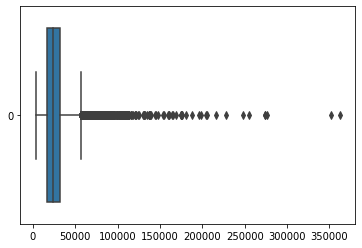

In [ ]:
sns.boxplot(data = credit_scoring_notnull['total_income'], orient="h")

In [ ]:
credit_scoring['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [ ]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
#def fill_null_total_income (data, agg_column, value_column):
    #grouped_values = credit_scoring.groupby(agg_column)[value_column].median().reset_index()
    #size = len(grouped_values)
    #for i in range(size):
        #group = grouped_values[agg_column][i]
        #value = grouped_values[value_column][i]
        #data.loc[(data[agg_column]==group) & (data[agg_column].isna()), value_column] = value
    #return data
    
def fill_null_total_income(data):
    for i in range(len(data)):
        if ((data['education'][i] == "primary education") & (str(data['total_income'][i]) == 'nan')):
            data['total_income'][i] = 18741
        elif ((data['education'][i] == "secondary education") & (str(data['total_income'][i]) == 'nan')):
            data['total_income'][i] = 21837
        elif ((data['education'][i] == "some college") & (str(data['total_income'][i]) == 'nan')):
            data['total_income'][i] = 25599
        elif ((data['education'][i] == "bachelor's degree") & (str(data['total_income'][i]) == 'nan')):
            data['total_income'][i] = 28086
        elif ((data['education'][i] == "graduate degree") & (str(data['total_income'][i]) == 'nan')):
            data['total_income'][i] = 25161
    return data

In [ ]:
# Memeriksa bagaimana nilai di dalam kolom baru
credit_scoring.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,property related,Masa Dewasa
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car related,Masa Dewasa
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property related,Masa Dewasa
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education related,Masa Dewasa
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,Masa Lansia
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,property related,Masa Dewasa
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,property related,Masa Dewasa
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education related,Masa Lansia
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,wedding,Masa Dewasa
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,property related,Masa Dewasa


In [ ]:
# Terapkan fungsi tersebut ke setiap baris
credit_scoring_new = fill_null_total_income(credit_scoring)

In [ ]:
# Periksa apakah kita mendapatkan kesalahan
credit_scoring_new[credit_scoring_new['total_income'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category


[Jika Anda menemukan kesalahan dalam menyiapkan nilai untuk data yang hilang, mungkin berarti ada sesuatu yang istimewa tentang data untuk kategori tersebut. Mari pikirkan - Anda mungkin ingin memperbaiki beberapa hal secara manual, jika terdapat cukup data untuk menemukan median/rata-rata.]


In [ ]:
# Ganti nilai yang hilang jika terdapat kesalahan
'''Berdasarkan penemuan diatas tidak ada data yang hilang lagi'''

'Berdasarkan penemuan diatas tidak ada data yang hilang lagi'

[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [ ]:
# Periksa jumlah entri di kolom
print(credit_scoring['total_income'].shape)
print(credit_scoring.shape)

(20968,)
(20968, 13)


###  Memperbaiki nilai di `days_employed`

[Pikirkan tentang parameter yang dapat membantu Anda memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Anda mungkin perlu melakukan penelitian yang sama dengan yang Anda lakukan saat memperbaiki data di kolom sebelumnya.]

<AxesSubplot:>

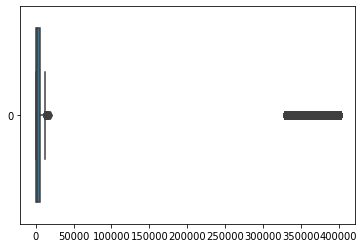

In [ ]:
sns.boxplot(data = credit_scoring_notnull['days_employed'], orient="h")

In [ ]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
total_income_median_pivot = credit_scoring_notnull.pivot_table(
    index='dob_years_category',
    columns='income_type',
    values='days_employed',
    aggfunc='mean',
)
total_income_median_pivot

income_type,business,civil servant,employee,retiree
dob_years_category,,,,
Anak SMA,525.137538,509.969922,810.376486,NaN
Masa Dewasa,1881.010371,2942.408937,2069.420360,364295.980201
Masa Lansia,2901.194151,4574.660029,3164.199144,365056.700978
Masa Remaja,869.010176,1184.702095,931.852227,334764.259831


In [ ]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
total_income_median_pivot = credit_scoring_notnull.pivot_table(
    index='dob_years_category',
    columns='income_type',
    values='days_employed',
    aggfunc='mean',
)
total_income_median_pivot

income_type,business,civil servant,employee,retiree
dob_years_category,,,,
Anak SMA,525.137538,509.969922,810.376486,NaN
Masa Dewasa,1881.010371,2942.408937,2069.420360,364295.980201
Masa Lansia,2901.194151,4574.660029,3164.199144,365056.700978
Masa Remaja,869.010176,1184.702095,931.852227,334764.259831


[Tentukan apa yang akan Anda gunakan: rata-rata atau median. Jelaskan mengapa.]

**Menggunakan median karena terdapat outlier pada boxplotnya**

In [ ]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi
def fill_null_days_employed(data):
    for i in range(len(data)):
        if ((data.loc[:,'income_type'][i] == "business") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 1550
        elif ((data.loc[:,'income_type'][i] == "civil servant") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 2673
        elif ((data.loc[:,'income_type'][i] == "employee") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 1573
        elif ((data.loc[:,'income_type'][i] == "entrepreneur") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 520
        elif ((data.loc[:,'income_type'][i] == "paternity / maternity leave") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 3296
        elif ((data.loc[:,'income_type'][i] == "retiree") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 365247
        elif ((data.loc[:,'income_type'][i] == "student") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 578
        elif ((data.loc[:,'income_type'][i] == "retiree") & (str(data.loc[:,'days_employed'][i]) == 'nan')):
            data['days_employed'][i] = 366413        
    return data

In [ ]:
# Periksa apakah fungsi Anda dapat bekerja


In [ ]:
# Terapkan fungsi ke income_type
credit_scoring = fill_null_days_employed(credit_scoring)

In [ ]:
# Periksa apakah fungsi Anda bekerja
credit_scoring[credit_scoring_new['days_employed'].isnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category


[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [ ]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20968 entries, 0 to 20967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            20968 non-null  int64  
 1   days_employed       20968 non-null  float64
 2   dob_years           20968 non-null  int64  
 3   education           20968 non-null  object 
 4   education_id        20968 non-null  int64  
 5   family_status       20968 non-null  object 
 6   family_status_id    20968 non-null  int64  
 7   gender              20968 non-null  object 
 8   income_type         20968 non-null  object 
 9   debt                20968 non-null  int64  
 10  total_income        20968 non-null  float64
 11  purpose             20968 non-null  object 
 12  dob_years_category  20968 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


#### Pengkategorian Data

[Untuk menjawab pertanyaan dan menguji hipotesis, Anda akan bekerja dengan data yang telah dikategorikan. Lihatlah pertanyaan-pertanyaan yang diajukan kepada Anda dan yang harus Anda jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Di bawah ini, Anda akan menemukan templat yang bisa Anda gunakan untuk mengkategorikan data. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan. Anda dapat menggunakan kedua petunjuk yang disarankan atau tidak sama sekali - semuanya terserah Anda.]

[Terlepas dari keputusan Anda untuk mengatasi pengkategorian, pastikan bahwa Anda secara lugas memberikan penjelasan tentang mengapa Anda membuat keputusan tersebut. Ingat: ini adalah pekerjaan Anda dan Andalah yang berhak membuat segala keputusan.]


In [ ]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
filtered_credit_scoring = credit_scoring[['children','family_status','total_income','purpose','debt']]

filtered_credit_scoring

,children,family_status,total_income,purpose,debt
0,1,married,40620.102,property related,0
1,1,married,17932.802,car related,0
2,0,married,23341.752,property related,0
3,3,married,42820.568,education related,0
4,0,civil partnership,25378.572,wedding,0
...,...,...,...,...,...
20963,1,civil partnership,35966.698,property related,0
20964,0,married,24959.969,car related,0
20965,1,civil partnership,14347.610,property related,1
20966,3,married,39054.888,car related,1


[Mari kita memeriksa nilai unik]

In [ ]:
# Periksa nilai unik
filtered_credit_scoring['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [ ]:
filtered_credit_scoring['family_status'].unique()

array(['married', 'civil partnership', 'divorced', 'unmarried'],
      dtype=object)

In [ ]:
filtered_credit_scoring['purpose'].unique()

array(['property related', 'car related', 'education related', 'wedding'],
      dtype=object)

In [ ]:
filtered_credit_scoring['debt'].value_counts()

0    19240
1     1728
Name: debt, dtype: int64

[Kelompok utama apakah yang dapat Anda identifikasi berdasarkan nilai uniknya?]
**children, family_status, debt dan purpose**

[Kita akan mengkategorikan data kita berdasarkan topik ini.]


In [ ]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def marital_status(family_status):
    if family_status == 'married': 
        return 'mingle'
    elif family_status == 'civil_partnership': 
        return 'mingle'
    elif family_status == 'unmarried':
        return 'single'
    elif family_status == 'divorced':
        return 'single'

In [ ]:
# Buat kolom yang memuat kategori dan hitung nilainya
filtered_credit_scoring.loc[:,'marital_status'] = filtered_credit_scoring['family_status'].apply(marital_status)
filtered_credit_scoring.head()

,children,family_status,total_income,purpose,debt,marital_status
0,1,married,40620.102,property related,0,mingle
1,1,married,17932.802,car related,0,mingle
2,0,married,23341.752,property related,0,mingle
3,3,married,42820.568,education related,0,mingle
4,0,civil partnership,25378.572,wedding,0,None


[Jika Anda memutuskan untuk mengategorikan data numerik, Anda juga harus membuat kategori untuk data tersebut.]

In [ ]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian

In [ ]:
# Dapatkan kesimpulan statistik untuk kolomnya
filtered_credit_scoring.groupby('debt')['marital_status'].value_counts()


debt  marital_status
0     mingle            11075
      single             4455
1     mingle              922
      single              420
Name: marital_status, dtype: int64

[Tentukan rentang apa yang akan Anda gunakan untuk pengelompokan dan jelaskan alasannya.]

**rentang yang digunakan adalah berdasarkan rentang total_income karena menurut saya yang dapat menyebabkan sesorang gagal bayar kredit mereka adalah karena pengeluaran dan pemasukan yang tidak seimbang**

In [ ]:
filtered_credit_scoring.loc[:,'total_income'] = filtered_credit_scoring['total_income'].astype('float')

filtered_credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20968 entries, 0 to 20967
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   children        20968 non-null  int64  
 1   family_status   20968 non-null  object 
 2   total_income    20968 non-null  float64
 3   purpose         20968 non-null  object 
 4   debt            20968 non-null  int64  
 5   marital_status  16872 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 983.0+ KB


In [ ]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def total_income_category(income):
    if income <= 50000:
        return 'low'
    elif income <= 100000:
        return 'average'
    elif income > 100000:
        return 'high'

In [ ]:
# Buat kolom yang memuat kategori
filtered_credit_scoring['total_income_category'] = filtered_credit_scoring.total_income.apply(total_income_category)

In [ ]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
filtered_credit_scoring.groupby('debt')['total_income_category'].value_counts()

debt  total_income_category
0     low                      18016
      average                   1131
      high                        93
1     low                       1636
      average                     86
      high                         6
Name: total_income_category, dtype: int64

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

In [ ]:
# Periksa data anak dan data pelunasan tepat waktu
payment_on_time = filtered_credit_scoring[filtered_credit_scoring['debt']==0]
children_on_time_payment = payment_on_time.groupby('children')['debt'].count()

# Hitung gagal bayar berdasarkan jumlah anak
payment_late = filtered_credit_scoring[filtered_credit_scoring['debt']==1]
children_late_payment =payment_late.groupby('children')['debt'].count()

print(children_on_time_payment)
print(children_late_payment)
print(children_late_payment/children_on_time_payment)

children
0    12702
1     4294
2     1899
3      300
4       36
5        9
Name: debt, dtype: int64
children
0    1056
1     440
2     201
3      27
4       4
Name: debt, dtype: int64
children
0    0.083137
1    0.102469
2    0.105845
3    0.090000
4    0.111111
5         NaN
Name: debt, dtype: float64


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.]

**Tidak ada hubungan antara risiko gagal bayar nasabah dengan jumlah anak**

**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

In [ ]:
# Periksa data status keluarga dan pelunasan tepat waktu
status_on_time_payment = payment_on_time.groupby('family_status')['debt'].count()


# Hitung gagal bayar berdasarkan status keluarga
status_late_payment = payment_late.groupby('family_status')['debt'].count()
print(status_on_time_payment)
print(status_late_payment)
print(status_late_payment/status_on_time_payment)

family_status
civil partnership     3710
divorced              1966
married              11075
unmarried             2489
Name: debt, dtype: int64
family_status
civil partnership    386
divorced             147
married              922
unmarried            273
Name: debt, dtype: int64
family_status
civil partnership    0.104043
divorced             0.074771
married              0.083251
unmarried            0.109683
Name: debt, dtype: float64


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.]

**Nasabah dengan family status civil partnership dan unmarried memiliki persentase gagal bayar lebih tinggi dari pada nasabah dengan family_status married dan divorce**

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [ ]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu
income_category_on_time_payment = payment_on_time.groupby('total_income_category')['debt'].count()


# Hitung gagal bayar berdasarkan tingkat pendapatan
income_category_late_payment = payment_late.groupby('total_income_category')['debt'].count()
print(income_category_on_time_payment)
print(income_category_late_payment)
print(income_category_late_payment/income_category_on_time_payment)

total_income_category
average     1131
high          93
low        18016
Name: debt, dtype: int64
total_income_category
average      86
high          6
low        1636
Name: debt, dtype: int64
total_income_category
average    0.076039
high       0.064516
low        0.090808
Name: debt, dtype: float64


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.]

**Nasabah yang tingkat pendapatan rendah memiliki resiko gagal bayar yang lebih tinggi dan resiko ini menurun seiring dengan peningkatan pendapatan**

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [ ]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
purpose_on_time_payment = payment_on_time.groupby('purpose')['debt'].count()
purpose_late_payment = payment_late.groupby('purpose')['debt'].count()
print(purpose_late_payment/purpose_on_time_payment)

purpose
car related          0.103359
education related    0.103758
property related     0.079881
wedding              0.087369
Name: debt, dtype: float64


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.]

**Nasabah yang melakukan peminjaman dengan tujuan yang berhubungan dengan properti memiliki resifiko gagal bayar paling rendah, diikuti dengan tujuan pernikahan dan resiko tertinggi ada pada tujuan yang berhubungan dengan mobil dan pendidikan**


# Kesimpulan umum 

[Tuliskan kesimpulan Anda di bagian akhir ini. Pastikan Anda memasukkan semua kesimpulan penting yang telah Anda buat berkaitan dengan cara Anda memproses dan menganalisis data. Kesimpulan tersebut harus membahas nilai yang hilang, duplikat, dan kemungkinan alasan serta solusi untuk data bermasalah yang harus Anda tangani.]

[Tuliskan juga kesimpulan Anda mengenai pertanyaan-pertanyaan yang diajukan di sini.]


**Secara umum nasabah yang tingkat pendapatan rendah memiliki resiko gagal bayar yang lebih tinggi dan resiko ini menurun seiring dengan peningkatan pendapatan, selain itu resiko gagal bayar nasabah dapat dihubungkan pula dengan tujuan peminjaman nasabah dimana nasabah yang melakukan peminjaman dengan tujuan yang berhubungan dengan properti memiliki resifiko gagal bayar paling rendah diikuti dengan tujuan pernikahan dan resiko tertinggi ada pada tujuan yang berhubungan dengan mobil dan pendidikan.**

**Jika dikaitkan dengan family status, maka nasabah dengan family status civil partnership dan unmarried memiliki persentase gagal bayar lebih tinggi dari pada nasabah dengan family_status married dan divorce.**